In [7]:
import numpy as np

In [1]:
#analyse words made of amino acids
import json
with open('dictionnaries.json','r') as fb:
    data = json.load(fb)

In [2]:
amino_acids = ['a','r','n','d','c','e','q','g','h','i','l','k','m','f','p','s','t','w','y','v']

In [3]:
data['french']

[u'abaissait',
 u'abaisse',
 u'abandon',
 u'abandonneriez',
 u'abandonnez',
 u'abattement',
 u'abattit',
 u'abattu',
 u'abattus',
 u'abbe',
 u'abc',
 u'abdication',
 u'abdomen',
 u'abdominales',
 u'abel',
 u'abime',
 u'abondamment',
 u'abondance',
 u'abonne',
 u'abonnes',
 u'abord',
 u'abordaient',
 u'aborde',
 u'about',
 u'aboutiraient',
 u'abrege',
 u'abregeat',
 u'abri',
 u'abriteras',
 u'abrutir',
 u'absence',
 u'absent',
 u'absolu',
 u'absolue',
 u'absolument',
 u'absorber',
 u'absorbera',
 u'absurde',
 u'absurdes',
 u'absurdites',
 u'abus',
 u'abusaient',
 u'abusent',
 u'academie',
 u'accabla',
 u'accablant',
 u'accablement',
 u'accablez',
 u'accaparer',
 u'accent',
 u'accepta',
 u'accepte',
 u'acceptee',
 u'accepter',
 u'acceptez',
 u'acces',
 u'accessoire',
 u'accident',
 u'accidents',
 u'accolade',
 u'accommodant',
 u'accommodement',
 u'accompagnait',
 u'accompagne',
 u'accompagner',
 u'accompli',
 u'accomplie',
 u'accomplir',
 u'accomplis',
 u'accord',
 u'accorde',
 u'accorde

In [4]:
data['french'][0]

u'abaissait'

In [8]:
np.sum([x not in amino_acids for x in data['french'][0]])

1

In [10]:
np.sum([x not in amino_acids for x in data['french'][100]])

0

In [11]:
non_aa_words = []
for word in data['french']:
    non_aa_words.append(np.sum([x not in amino_acids for x in word]))

In [14]:
non_aa_words.count(0)

3065

In [15]:
non_aa_words.count(0)/float(len(non_aa_words))

0.3764893747696843

In [17]:
# wich language is the most proteic ?
count_non_aa_words = []
freq_non_aa_words = []
list_lang = []
for k,v in data.items():
    non_aa_words = []
    for word in v:
        non_aa_words.append(np.sum([x not in amino_acids for x in word]))
    count_non_aa_words.append(non_aa_words.count(0))
    freq_non_aa_words.append(non_aa_words.count(0)/float(len(non_aa_words)))
    list_lang.append(k)

In [18]:
import pandas as pd
aa_words = pd.DataFrame({'lang': list_lang, 'nb_aa_words': count_non_aa_words, 'freq_aa_words': freq_non_aa_words})

In [19]:
aa_words.head()

,freq_aa_words,lang,nb_aa_words
0,0.430843,irish,542
1,0.230995,czech,4321
2,0.352113,interlingua,600
3,0.126133,inuktitut,974
4,0.282623,galician,444


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
aa_words.sort_values('freq_aa_words', inplace=True)

In [23]:
aa_words.head()

,freq_aa_words,lang,nb_aa_words
22,0.103357,kashubian,157
3,0.126133,inuktitut,974
23,0.146909,arapaho,777
8,0.198036,polish,484
7,0.220677,spanish,4888


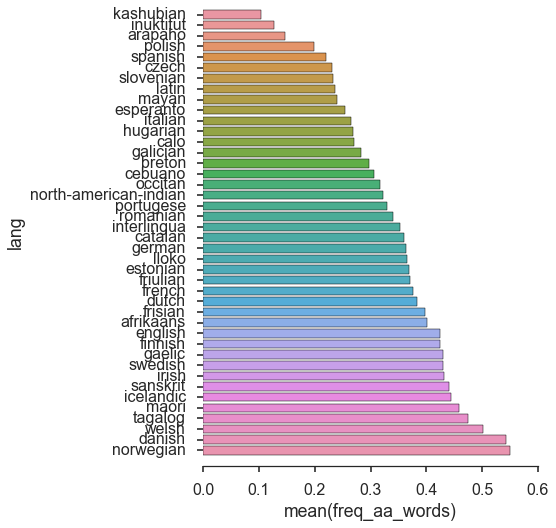

In [61]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
sns.barplot(x="freq_aa_words", y="lang", data=aa_words)
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
plt.show()

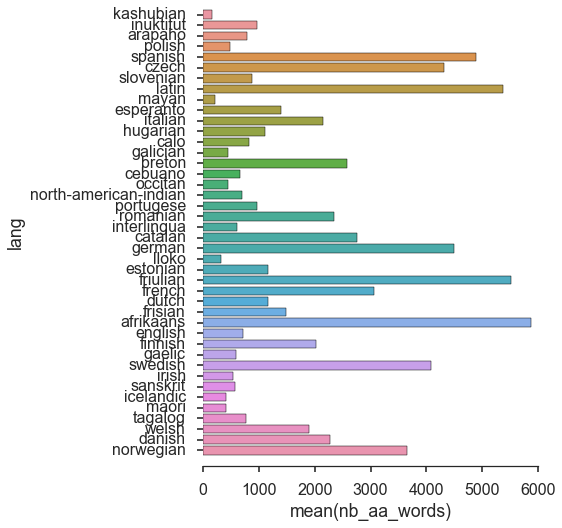

In [62]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
sns.barplot(x="nb_aa_words", y="lang", data=aa_words)
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
plt.show()

In [65]:
#selecting aa_words
aa_word_data = dict()
for k,v in data.items():
    collecting_list = []
    for word in v:
        if np.sum([x not in amino_acids for x in word]) == 0:
            collecting_list.append(word)
    aa_word_data[k] = collecting_list

## Loading proteins

In [78]:
fastaList = []
for line in open("uniprot-proteome.fasta"):
    li = line.strip()
    if not li.startswith(">"):
        fastaList.append(line.lower())

In [79]:
len(fastaList)

660157

In [80]:
fastaList[:3]

['maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlqyigegaygmvssay\n',
 'dhvrktrvaikkispfehqtycqrtlreiqillrfrhenvigirdilrastleamrdvyi\n',
 'vqdlmetdlykllksqqlsndhicyflyqilrglkyihsanvlhrdlkpsnllinttcdl\n']

## Finding words in proteins

In [87]:
languages = aa_words.lang.tolist()
languages[:3]

[u'kashubian', u'inuktitut', u'arapaho']

In [265]:
#create a zero numpy array of shape max(dict length) vs. language
max_dict_len = 0
for k,v in aa_word_data.iteritems():
    if len(v)>max_dict_len:
        max_dict_len = len(v)

In [266]:
max_dict_len

5883

In [267]:
len(languages)

42

In [268]:
aa_words_matrix = np.zeros((len(languages),max_dict_len), dtype=int)

In [269]:
for i,langue in enumerate(languages):
    for j,word in enumerate(aa_word_data[langue]):
        aa_words_matrix[i,j] = np.sum([word in x for x in fastaList])

In [270]:
np.save("aa_words_matrix", aa_words_matrix)

In [271]:
words_df = pd.DataFrame(aa_words_matrix, index=languages)

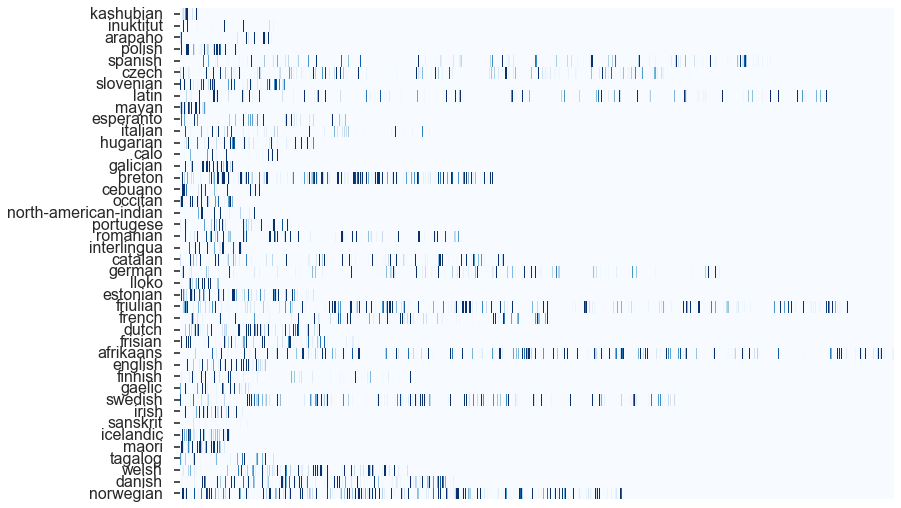

In [272]:
sns.heatmap(words_df, square=False, xticklabels=False, robust=True, cbar=False, cmap="Blues")
plt.show()

## Number of words in proteins for each languages

In [273]:
count_df = words_df.apply(np.count_nonzero, axis=1)

In [274]:
count_df.sort_values(inplace=True)

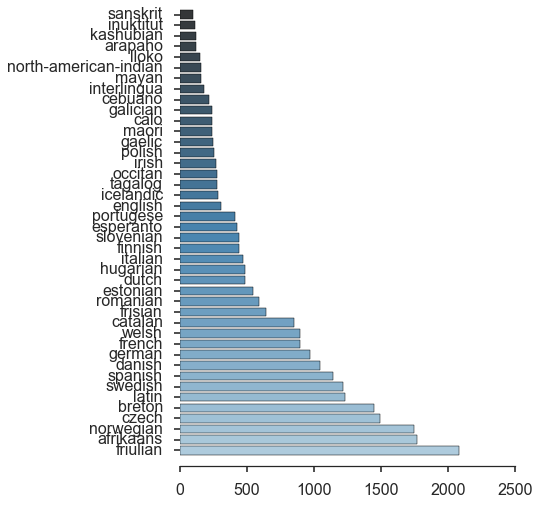

In [275]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
sns.barplot(count_df, count_df.index, palette="Blues_d")
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
plt.show()

## Counting the number of words by word length

In [276]:
data_indexes = dict()
nb_words_per_length = []
for k,v in aa_word_data.items():
    nb_words_per_length = []
    for h in range(2,25):
        nb_words_per_length.append([aa_word_data[k].index(x) for x in aa_word_data[k] if len(x) == h])
    data_indexes[k] = nb_words_per_length

In [277]:
data_nb_words = []
languages = []
for k,v in data_indexes.items():
    nb_diff_words = []
    for i in range(len(v)):
        nb_diff_words.append(np.count_nonzero(v[i]))
    data_nb_words.append(nb_diff_words)
    languages.append(k)

In [278]:
df_nb_words = pd.DataFrame(data_nb_words, index=languages, columns=range(2,25))

In [279]:
df_nb_words

,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
irish,0,56,96,102,104,79,55,31,12,3,...,0,0,0,0,0,0,0,0,0,0
czech,0,152,393,772,931,849,564,356,175,74,...,3,1,0,0,0,0,0,0,0,0
interlingua,0,26,48,86,99,103,90,69,44,21,...,0,0,0,0,0,0,0,0,0,0
inuktitut,0,27,38,36,51,108,100,120,105,75,...,32,29,24,12,4,3,3,0,0,0
galician,0,51,58,106,83,56,40,24,15,3,...,1,0,0,0,0,0,0,0,0,0
portugese,0,60,113,207,174,139,123,72,40,14,...,1,1,0,0,0,0,0,0,0,0
friulian,0,232,564,971,1180,1059,708,420,220,96,...,3,0,0,0,0,0,0,0,0,0
spanish,0,86,288,580,749,858,839,646,449,205,...,11,4,0,0,0,0,0,0,0,0
polish,0,65,91,115,102,62,23,11,11,2,...,0,0,0,0,0,0,0,0,0,0
esperanto,0,45,107,188,240,266,218,148,116,32,...,0,0,0,0,0,0,0,0,0,0


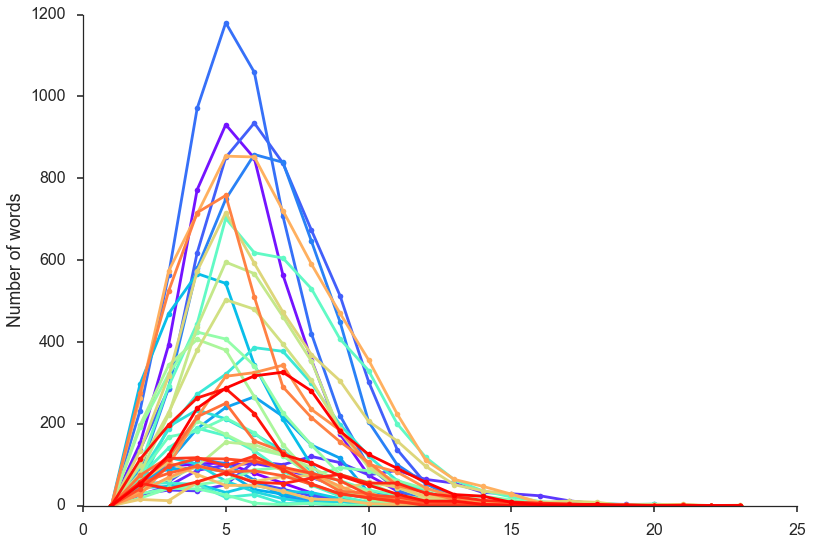

In [280]:
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(set(df_nb_words.index)))))
df = df_nb_words.T
cat = range(1,24)
for lang in set(df_nb_words.index):
    plt.plot(cat, df[lang], '.-', color=next(color))

plt.ylabel('Number of words')
sns.despine()
plt.show()

## Top words in each languages

In [316]:
languages = aa_words.lang.tolist()
for i, lang in enumerate(languages):
    word = aa_word_data[lang][np.argmax(aa_words_matrix[i,:])]
    print("%21s : %10s" %(lang, word))

            kashubian :        ale
            inuktitut :        ill
              arapaho :        all
               polish :        ale
              spanish :        lee
                czech :        sla
            slovenian :        sel
                latin :        see
                mayan :        lal
            esperanto :        ses
              italian :        all
             hugarian :        all
                 calo :        las
             galician :        lle
               breton :        all
              cebuano :        asa
              occitan :        sas
north-american-indian :        eve
            portugese :        les
             romanian :        ele
          interlingua :        ala
              catalan :        lla
               german :        all
                lloko :        ala
             estonian :        all
             friulian :        all
               french :        pas
                dutch :        als
              frisia

## Longuest words

In [318]:
for i, lang in enumerate(languages):
    word = aa_word_data[lang][np.argmax(np.nonzero(aa_words_matrix[i,:]))]
    print("%21s : %20s" %(lang, word))

            kashubian :                slane
            inuktitut :            aniagavit
              arapaho :     hadnavethevathee
               polish :               plemie
              spanish :           delgadilla
                czech :              nasinec
            slovenian :              placana
                latin :             desertis
                mayan :                  pet
            esperanto :                fikse
              italian :                  der
             hugarian :             keptelen
                 calo :               decima
             galician :                 leva
               breton :               levrdi
              cebuano :            kagawasan
              occitan :          mvltiplicis
north-american-indian :            edamingin
            portugese :              ficasse
             romanian :               depasi
          interlingua :                divin
              catalan :            endinsava
          